In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utilities import *

In [5]:
X, y, Xtest, yt = load_data() 

In [6]:
X.shape

(1000, 64, 64)

In [11]:
Xr=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
Xr.shape #1000 images et 4096 observations

(1000, 4096)

In [12]:
y.shape #à chaque image, si un chien ou chat

#   0 _ chat
#   1 _ chien

(1000, 1)

In [15]:
# etape 1 : avoir la matrice de correlation
Cor=np.corrcoef(Xr)

In [16]:
# etape 2 : déterminer ses valeurs propres
vals_propres,P = np.linalg.eig(Cor)

In [17]:
# Calculer l'inertie de la composante principale et du plan principal
inertie = sum(vals_propres)
inertie_cp = vals_propres[0]/inertie
inertie_pp = (vals_propres[0]+vals_propres[1])/inertie
print("inertie :",inertie)
print("inertie composante principale :", inertie_cp)
print("inertie plan principal", inertie_pp)

inertie : 1000.000000000001
inertie composante principale : 0.1403882304823108
inertie plan principal 0.2375208983053297


Text(0.5, 1.0, 'Ebouli des valeurs propres')

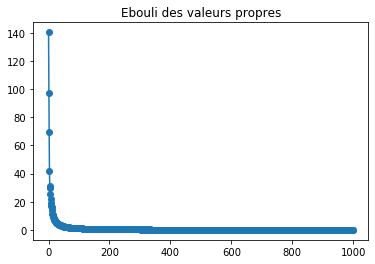

In [18]:
liste = [i for i in range(1000)] 

plt.scatter(liste,vals_propres)
plt.plot(liste,vals_propres)
plt.title("Ebouli des valeurs propres")

In [20]:
# etape 3 : diagonaliser la matrice de corrélation. Soit P sa matrice de passage
D = np.diag(vals_propres)

In [21]:
# fonction utile

def moy(X):
    e=0
    n=len(X)
    for i in range(n):
        e+=X[i]
    return e/n

def varS(X):
    v=0
    n=len(X)
    m=moy(X)
    for i in range(n):
        v+=(X[i]-m)**2
    return v/n

def ecTypeS(X):
    return np.sqrt(varS(X))


In [23]:
# etape 4 : centré-réduire

# chaque valeur est retire la moyenne de sa ligne et divise par l ecart type de sa ligne
# centre reduit !

X = []
for ligne in Xr :
    L = []
    ecarttype = ecTypeS(ligne)
    moyenne = moy(ligne)
    for valeur in ligne :
        L.append((valeur - moyenne) / ecarttype)
        pass
    X.append(L)
    pass
X = np.transpose(X)


KeyboardInterrupt: 

In [ ]:
# etape 5 : construire les deux composantes principales
C = np.dot(X,P)

Ct = np.transpose(C)

C1 = Ct[0]
C2 = Ct[1]


In [ ]:
# etape 6 : Tracé les différents véhicules suivant les deux composantes principales
plt.scatter(C1,C2,marker='o')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title("Tracé suivant les composantes principales")